In [1]:
import pandas as pd
import os, sys
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
working_dir = r'../../../../outputs/agg/dash'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Tour Stops
Number of Trips per Tour

## First Half Tour (Outbound)
Trips part of first tour leg (to primary destination).

### All Purposes

In [4]:
fname = 'tour_stops_outbound'
df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))

df_model['source'] = 'Model'
df_survey['source'] = 'Survey'
df = df_model.append(df_survey)

source,Model,Survey
tripsh2,,
1,76.15%,72.40%
2,18.18%,17.31%
3,4.46%,5.81%
4,0.84%,2.55%
5,0.24%,0.74%


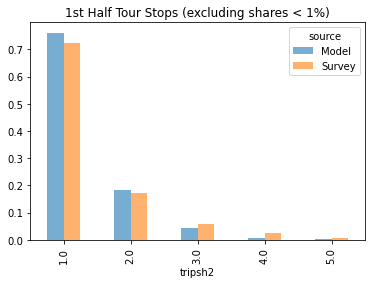

In [5]:
_df = df.pivot_table(index='tripsh2', columns='source', values='toexpfac', aggfunc='sum')
_df = _df.fillna(0)
_df['Model'] = _df['Model']/_df['Model'].sum()
_df['Survey'] = _df['Survey']/_df['Survey'].sum()
_df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
_df.plot(kind='bar', alpha=0.6, title='1st Half Tour Stops (excluding shares < 1%)')
for col in ['Model','Survey']:
    _df[col] = _df[col].apply(format_percent)
_df

### By Purpose

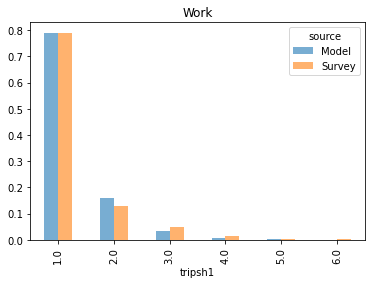

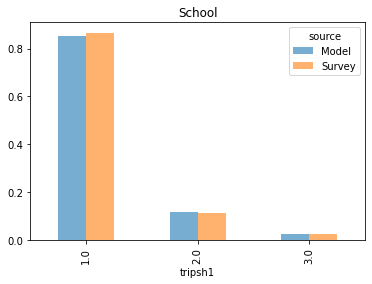

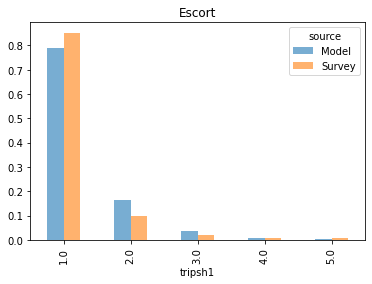

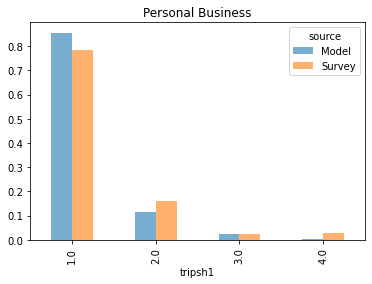

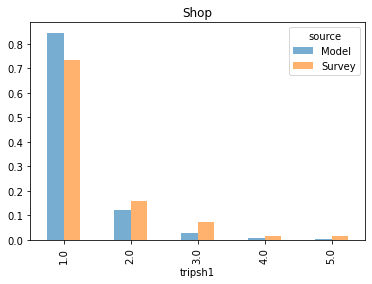

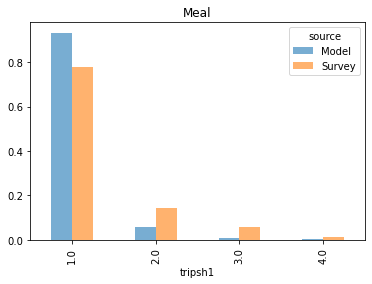

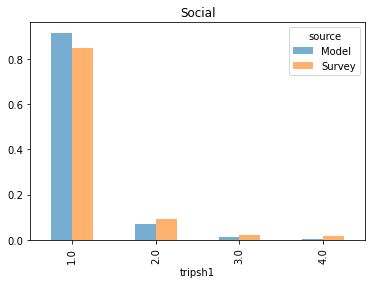

In [6]:
for purp in df['pdpurp'].unique():
    _df = df[df['pdpurp'] == purp]
    _df = _df.pivot_table(index='tripsh1', columns='source', values='toexpfac', aggfunc='sum')
    if ('Model' in _df.columns) and ('Survey' in _df.columns):
        
        _df = _df.fillna(0)
        _df
        _df['Model'] = _df['Model']/_df['Model'].sum()
        _df['Survey'] = _df['Survey']/_df['Survey'].sum()
        _df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
        _df.plot(kind='bar', alpha=0.6, title=purp)


## Second Half Tour (Return/Inbound)

### All Purposes

source,Model,Survey
tripsh2,,
1,76.15%,72.40%
2,18.18%,17.31%
3,4.46%,5.81%
4,0.84%,2.55%
5,0.24%,0.74%


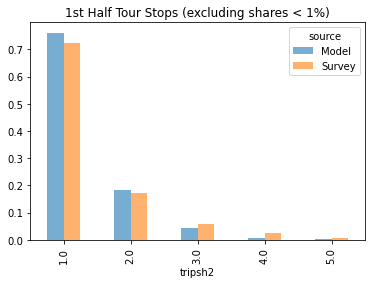

In [7]:
_df = df.pivot_table(index='tripsh2', columns='source', values='toexpfac', aggfunc='sum')
_df = _df.fillna(0)
_df['Model'] = _df['Model']/_df['Model'].sum()
_df['Survey'] = _df['Survey']/_df['Survey'].sum()
_df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
_df.plot(kind='bar', alpha=0.6, title='1st Half Tour Stops (excluding shares < 1%)')
for col in ['Model','Survey']:
    _df[col] = _df[col].apply(format_percent)
_df

### By Purpose

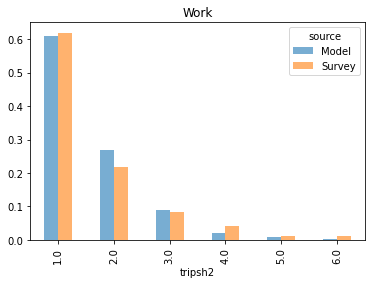

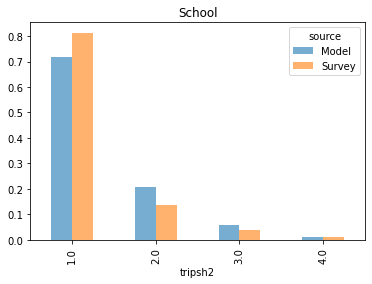

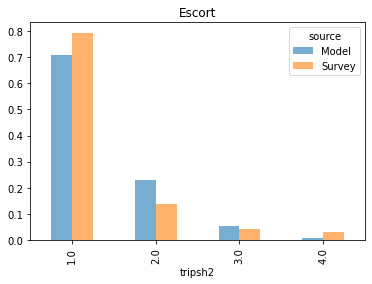

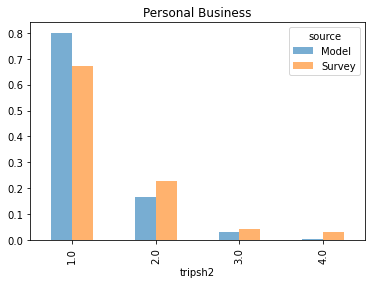

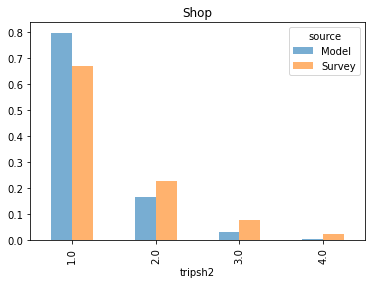

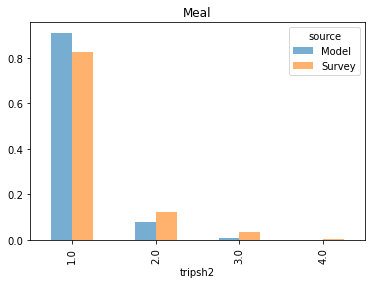

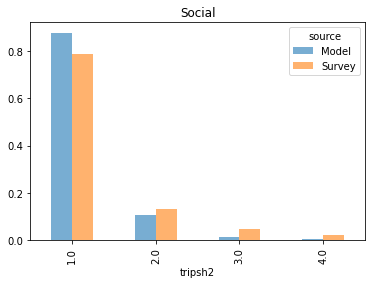

In [8]:
for purp in df['pdpurp'].unique():
    _df = df[df['pdpurp'] == purp]
    _df = _df.pivot_table(index='tripsh2', columns='source', values='toexpfac', aggfunc='sum')
    if ('Model' in _df.columns) and ('Survey' in _df.columns):
        
        _df = _df.fillna(0)
        _df
        _df['Model'] = _df['Model']/_df['Model'].sum()
        _df['Survey'] = _df['Survey']/_df['Survey'].sum()
        _df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
        _df.plot(kind='bar', alpha=0.6, title=purp)


# All Stops

### All Purposes

source,Model,Survey
all_stops,,
2,68.05%,61.73%
3,19.79%,19.46%
4,8.08%,9.61%
5,2.65%,4.44%
6,0.88%,1.91%
7,0.29%,1.18%
8,0.10%,0.69%


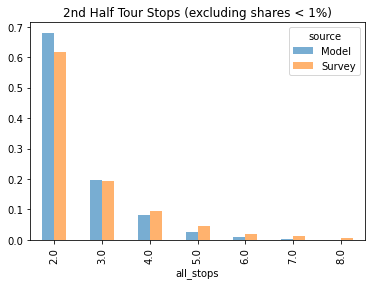

In [9]:
df['all_stops'] = df['tripsh1'] + df['tripsh2']
_df = df.pivot_table(index='all_stops', columns='source', values='toexpfac', aggfunc='sum')
_df = _df.fillna(0)
_df['Model'] = _df['Model']/_df['Model'].sum()
_df['Survey'] = _df['Survey']/_df['Survey'].sum()
_df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
_df.plot(kind='bar', alpha=0.6, title='2nd Half Tour Stops (excluding shares < 1%)')
for col in ['Model','Survey']:
    _df[col] = _df[col].apply(format_percent)
_df

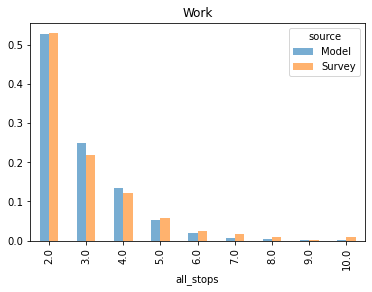

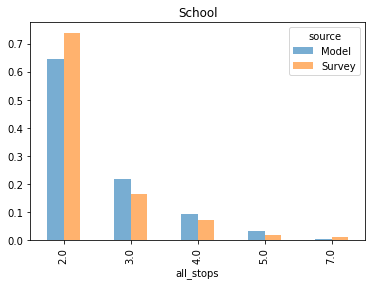

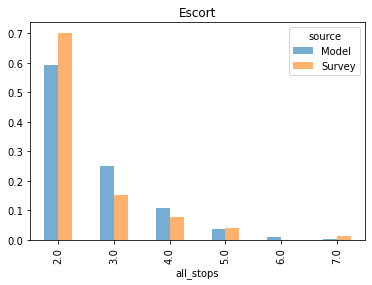

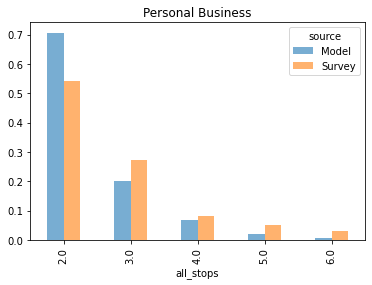

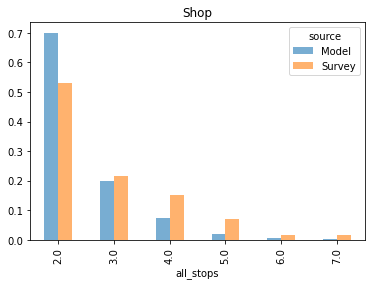

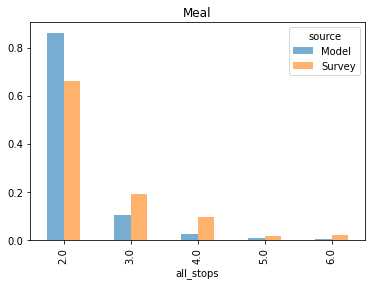

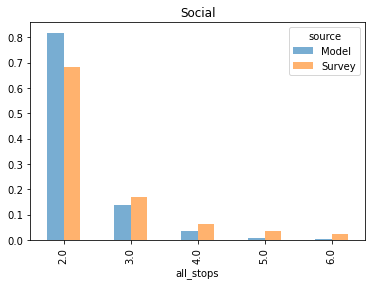

In [10]:
for purp in df['pdpurp'].unique():
    _df = df[df['pdpurp'] == purp]
    _df = _df.pivot_table(index='all_stops', columns='source', values='toexpfac', aggfunc='sum')
    if ('Model' in _df.columns) and ('Survey' in _df.columns):
        
        _df = _df.fillna(0)
        _df
        _df['Model'] = _df['Model']/_df['Model'].sum()
        _df['Survey'] = _df['Survey']/_df['Survey'].sum()
        _df = _df[(_df['Model'] > 0.001) & (_df['Survey'] > 0.001)]
        _df.plot(kind='bar', alpha=0.6, title=purp)
